## In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the load_dataset method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

b) Use describe only on those columns that are relevant to get statistical information from.

c) Make some plots on some of the columns that you find interesting.

d) Check if there are any columns you might want to drop.

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
df = sns.load_dataset("mpg")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
# Visa rader där horsepower är NaN
df[df['horsepower'].isnull()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


## Vad göra med nullvärden, linjär regression? Medelvärde eller medianvärde? Ta bort dem? Med median påverkar inte extremvärdena lika mycket

In [8]:
toyota_df = df[df['name'].str.contains("toyota", case=False)]
toyota_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
31,25.0,4,113.0,95.0,2228,14.0,71,japan,toyota corona
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200
57,24.0,4,113.0,95.0,2278,15.5,72,japan,toyota corona hardtop
84,27.0,4,97.0,88.0,2100,16.5,72,japan,toyota corolla 1600 (sw)
108,20.0,4,97.0,88.0,2279,19.0,73,japan,toyota carina
123,20.0,6,156.0,122.0,2807,13.5,73,japan,toyota mark ii
131,32.0,4,71.0,65.0,1836,21.0,74,japan,toyota corolla 1200
144,31.0,4,76.0,52.0,1649,16.5,74,japan,toyota corona
167,29.0,4,97.0,75.0,2171,16.0,75,japan,toyota corolla


## Ersätt NaN-värden med medianvärden för horsepower

In [9]:
print(df['horsepower'].isna().sum())

6


In [10]:
median_horsepower = df["horsepower"].median()
median_horsepower

np.float64(93.5)

In [11]:
# Ersätt nullvärden med medianvärdt
df["horsepower"] = df["horsepower"].fillna(median_horsepower)

In [12]:
df["horsepower"].isna().sum()

np.int64(0)

## Interesting plots

- hur mycket påverkar vikten miles per gallon

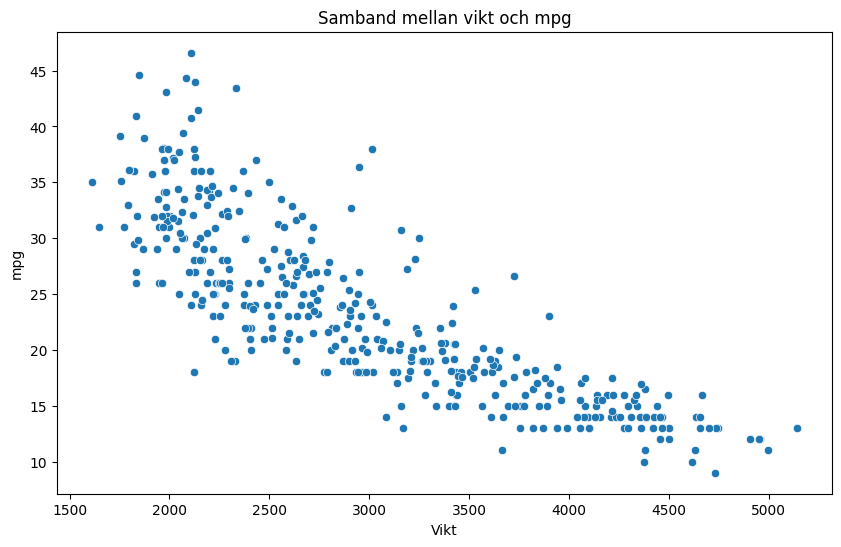

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="weight", y="mpg")

plt.title("Samband mellan vikt och mpg")
plt.xlabel("Vikt")
plt.ylabel("mpg")
plt.show()


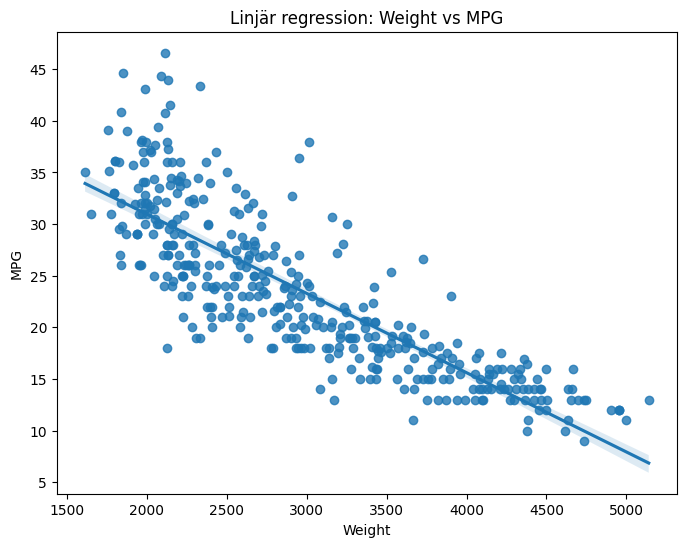

In [14]:
plt.figure(figsize=(8,6))
# regplot() räknar ut regressionslinjen automatiskt
sns.regplot(data=df, x="weight", y="mpg")

plt.title("Linjär regression: Weight vs MPG")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Plot - samband mellan modelår och mpg

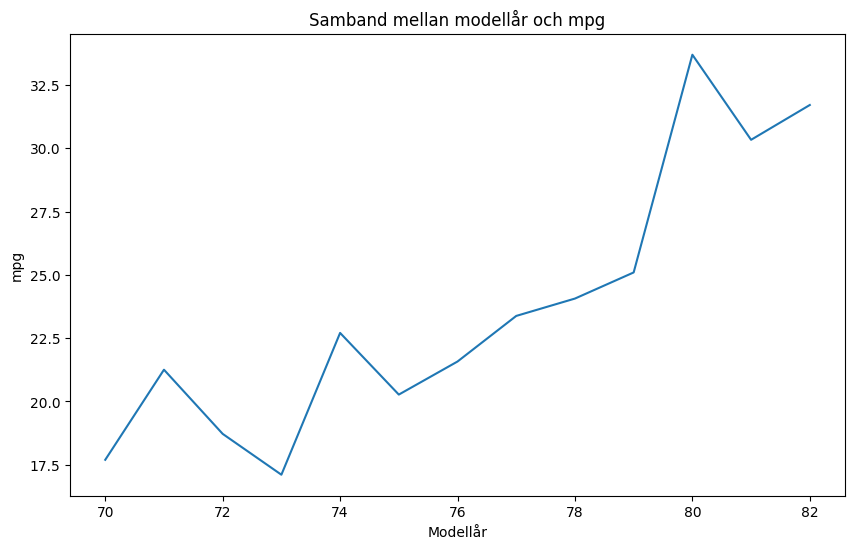

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="model_year", y="mpg", errorbar=None) # errorbar=None tar bort det skuggade området runt linjen som visar på eventuell felmarginal

plt.title("Samband mellan modellår och mpg")
plt.xlabel("Modellår")
plt.ylabel("mpg")
plt.show()


In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Ta bort oväsentliga kolumner

In [18]:
df = df.drop("origin", axis="columns")
df = df.drop("name", axis="columns")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


## Linear regression

- train|test split
- scale dataset
- fit algorithm to train model
- predict on test data
- evaluation metrics

In [19]:
df.shape
print(f"Antal rader = {df.shape[0]}")
print(f"Antal features = {df.shape[1] - 1}")
print(f"Label/target = mpg")

Antal rader = 398
Antal features = 6
Label/target = mpg


## Y = LABEL OCH X = FEATURES

In [20]:
X, y = df.drop("mpg", axis="columns"), df["mpg"]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [21]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [22]:
type(y), type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)


## Splitta train och test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [25]:
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (318, 6)
y_train.shape = (318,)
X_test.shape = (80, 6)
y_test.shape = (80,)


## Kolla så att samma index visas så att det inte blandats på något sätt

In [26]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
3,8,304.0,150.0,3433,12.0,70
18,4,97.0,88.0,2130,14.5,70
376,4,91.0,68.0,2025,18.2,82
248,4,91.0,60.0,1800,16.4,78
177,4,115.0,95.0,2694,15.0,75


In [27]:
y_train.head()

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
Name: mpg, dtype: float64

## Feature scaling
- min/max scaling
- värden blir mellan 0 och 1

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [29]:
scaler

,feature_range,"(0, ...)"
,copy,True
,clip,False


## Kontrollera så att de skalats mellan 0 och 1

In [30]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min() = }")
print(f"{scaled_X_train.max() = }")

scaled_X_train.min() = np.float64(0.0)
scaled_X_train.max() = np.float64(1.0)


In [31]:
print(f"{scaled_X_test.min() = }")
print(f"{scaled_X_test.max() = }")

scaled_X_test.min() = np.float64(0.0)
scaled_X_test.max() = np.float64(1.0279329608938548)


In [32]:
scaled_X_train.shape

(318, 6)

In [33]:
scaled_X_train[:5]

array([[1.        , 0.60981912, 0.58100559, 0.51601928, 0.23809524,
        0.        ],
       [0.2       , 0.0749354 , 0.23463687, 0.1465835 , 0.38690476,
        0.        ],
       [0.2       , 0.05943152, 0.12290503, 0.11681316, 0.60714286,
        1.        ],
       [0.2       , 0.05943152, 0.07821229, 0.05301956, 0.5       ,
        0.66666667],
       [0.2       , 0.12144703, 0.27374302, 0.30649277, 0.41666667,
        0.41666667]])

## Linear regression

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
model.fit(scaled_X_train, y_train)
print(f"Parameters or weights: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Parameters or weights: [  0.34524582   0.62057895   0.51878403 -24.84313581   1.3543174
   9.61637815]
Intercept: 27.120198285314252


## Prediction

In [36]:
X_test.iloc[0]

cylinders          4.0
displacement      91.0
horsepower        53.0
weight          1795.0
acceleration      17.4
model_year        76.0
Name: 198, dtype: float64

In [37]:
sample_features = scaled_X_test[0].reshape(1, -1)
sample_features

array([[0.2       , 0.05943152, 0.03910615, 0.05160193, 0.55952381,
        0.5       ]])

In [38]:
model.predict(sample_features)

array([31.53042525])

In [39]:
y_test.iloc[0]

np.float64(33.0)

## Predict on the entire test data

In [40]:
y_pred = model.predict(scaled_X_test)
y_pred[:5]

array([31.53042525, 30.71093633, 21.75965091, 17.00444007, 12.61316451])

In [41]:
y_test.iloc[:5]

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
Name: mpg, dtype: float64

## Evaluate

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"{mae = }")
print(f"{mse = }")
print(f"{rmse = }")

mae = 2.466780800452033
mse = 9.440068465263385
rmse = np.float64(3.0724694408998414)
